# Import library

In [128]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [129]:
car_data=pd.read_csv("D:\Data Science\Data set\Vehicle Dataset\Car Dataset.csv")

In [130]:
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [131]:
car_data.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [132]:
car_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

# Describe Data

In [133]:
car_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [134]:
car_data=car_data.dropna()

In [135]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [136]:
car_data['mpg'].dtypes

dtype('float64')

# Data preprocessing

In [137]:
car_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# Data visualization

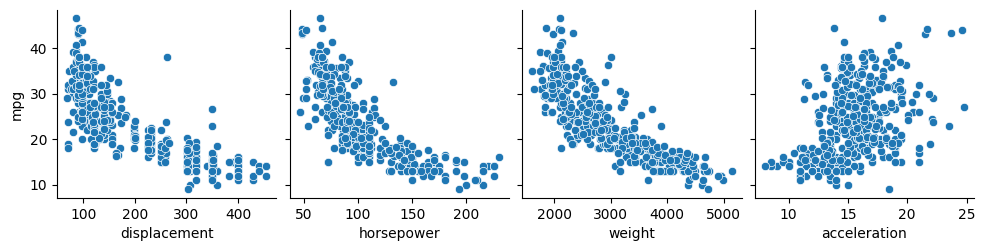

In [138]:
sns.pairplot(car_data,x_vars=['displacement','horsepower','weight','acceleration'],y_vars=['mpg'])

<AxesSubplot: xlabel='displacement', ylabel='mpg'>

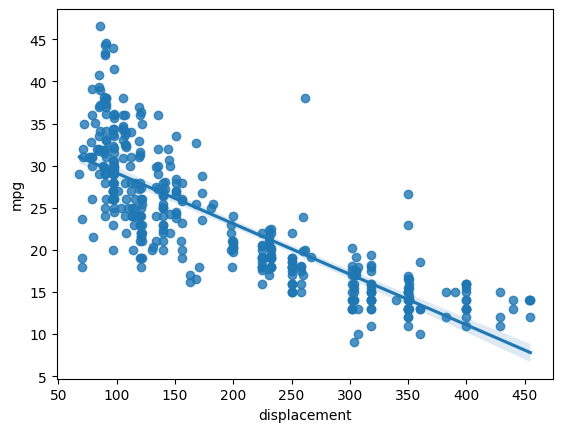

In [139]:
sns.regplot(x='displacement',y='mpg',data=car_data)

<AxesSubplot: >

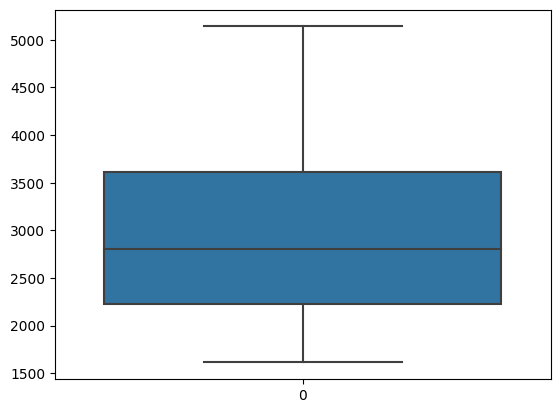

In [140]:
sns.boxplot(car_data['weight'])

<AxesSubplot: >

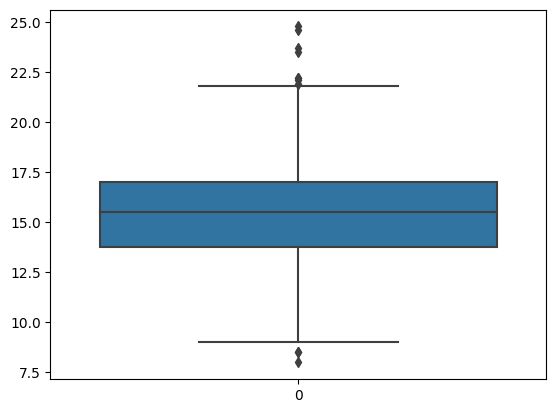

In [141]:
sns.boxplot(car_data['acceleration'])

In [142]:
car_data[car_data['acceleration']>25]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name


In [143]:
car_data[car_data['acceleration']>22.5 ] = car_data['acceleration'].mean()

In [144]:
car_data[car_data['acceleration']<9 ] = car_data['acceleration'].mean()

# Define Target Variable (y) and Feature Variables (X)

In [145]:
car_data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [146]:
y=car_data['mpg']

In [147]:
y.shape

(392,)

In [148]:
car_data['origin'].value_counts()

usa                   242
japan                  79
europe                 64
15.541326530612244      4
15.453482923781758      3
Name: origin, dtype: int64

In [149]:
car_data['origin'] = car_data['origin'].replace('15.541326530612244','usa',inplace=True)

In [150]:
car_data['origin'] = car_data['origin'].replace('15.453482923781758','japan',inplace=True)

In [151]:
from sklearn.preprocessing import LabelEncoder
l1 = LabelEncoder()
label = l1.fit_transform(car_data['origin'])
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [152]:
car_data['origin_lable']=label
car_data


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,origin_lable
0,18.000000,8.000000,307.000000,130.000000,3504.000000,12.000000,70.000000,None,chevrolet chevelle malibu,0
1,15.000000,8.000000,350.000000,165.000000,3693.000000,11.500000,70.000000,None,buick skylark 320,0
2,18.000000,8.000000,318.000000,150.000000,3436.000000,11.000000,70.000000,None,plymouth satellite,0
3,16.000000,8.000000,304.000000,150.000000,3433.000000,12.000000,70.000000,None,amc rebel sst,0
4,17.000000,8.000000,302.000000,140.000000,3449.000000,10.500000,70.000000,None,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
393,27.000000,4.000000,140.000000,86.000000,2790.000000,15.600000,82.000000,None,ford mustang gl,0
394,15.541327,15.541327,15.541327,15.541327,15.541327,15.541327,15.541327,None,15.541327,0
395,32.000000,4.000000,135.000000,84.000000,2295.000000,11.600000,82.000000,None,dodge rampage,0
396,28.000000,4.000000,120.000000,79.000000,2625.000000,18.600000,82.000000,None,ford ranger,0


In [153]:
x=car_data.drop(['mpg','origin','name','origin_lable'],axis=1)#[['displacement','horsepower','weight','acceleration','cylinders','model_year','origin_label']]
x

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8.000000,307.000000,130.000000,3504.000000,12.000000,70.000000
1,8.000000,350.000000,165.000000,3693.000000,11.500000,70.000000
2,8.000000,318.000000,150.000000,3436.000000,11.000000,70.000000
3,8.000000,304.000000,150.000000,3433.000000,12.000000,70.000000
4,8.000000,302.000000,140.000000,3449.000000,10.500000,70.000000
...,...,...,...,...,...,...
393,4.000000,140.000000,86.000000,2790.000000,15.600000,82.000000
394,15.541327,15.541327,15.541327,15.541327,15.541327,15.541327
395,4.000000,135.000000,84.000000,2295.000000,11.600000,82.000000
396,4.000000,120.000000,79.000000,2625.000000,18.600000,82.000000


In [154]:
x.shape

(392, 6)

In [155]:
x.dtypes

cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year      float64
dtype: object

# Train Test Split

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=2529)

In [158]:
len(x_train),len(x_test),len(car_data)

(274, 118, 392)

In [159]:
len(y_train),len(y_test),len(car_data)

(274, 118, 392)

In [160]:
len(car_data)

392

# Percentage allocation of data for Test and Train

In [161]:
train_data=(274/392)*100
print(train_data)

69.89795918367348


In [162]:
test_data=(118/392)*100
print(test_data)

30.102040816326532


# Scaling Data

In [163]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.fit_transform(x_test)

# Model selection 

In [164]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)
pred = linreg.predict(x_test)

In [165]:
from sklearn.metrics import r2_score
lr = r2_score(y_test, pred)*100
print(lr)

79.49928732785474


In [166]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(x_train,y_train)
pred1 = reg.predict(x_test)

In [167]:
dtr = r2_score(y_test, pred1)*100
print(dtr)

72.23844822047545


In [168]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50)
rf.fit(x_train,y_train)
pred2 = rf.predict(x_test)

In [169]:
rfr = r2_score(y_test, pred2)*100
print(rfr)

85.65387999492985


In [170]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
pred3 = knn.predict(x_test)

In [171]:
knr = r2_score(y_test,pred3)*100
print(knr)

69.9312166293875


In [172]:
from sklearn.linear_model import Lasso
lrg = Lasso()
lrg.fit(x_train, y_train)
pred4 = lrg.predict(x_test)

In [173]:
lgr = r2_score(y_test, pred4)*100 
print(lgr)

79.61033806066649


In [174]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(x_train,  y_train)
pred5 = rid.predict(x_test)

In [175]:
ridr = r2_score(y_test, pred5)*100
print(ridr)

79.50346173308478


In [176]:
print("Linear Regression : ", lr)
print("Desicion Tree : ", dtr)
print("Random Forest Regressor : ", rfr)
print("KNN Regressor : ", knr)
print("Lasso Linear Model : ", lgr)
print("Ridge Linear Model : ", ridr)

Linear Regression :  79.49928732785474
Desicion Tree :  72.23844822047545
Random Forest Regressor :  85.65387999492985
KNN Regressor :  69.9312166293875
Lasso Linear Model :  79.61033806066649
Ridge Linear Model :  79.50346173308478


In [177]:
x

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8.000000,307.000000,130.000000,3504.000000,12.000000,70.000000
1,8.000000,350.000000,165.000000,3693.000000,11.500000,70.000000
2,8.000000,318.000000,150.000000,3436.000000,11.000000,70.000000
3,8.000000,304.000000,150.000000,3433.000000,12.000000,70.000000
4,8.000000,302.000000,140.000000,3449.000000,10.500000,70.000000
...,...,...,...,...,...,...
393,4.000000,140.000000,86.000000,2790.000000,15.600000,82.000000
394,15.541327,15.541327,15.541327,15.541327,15.541327,15.541327
395,4.000000,135.000000,84.000000,2295.000000,11.600000,82.000000
396,4.000000,120.000000,79.000000,2625.000000,18.600000,82.000000


In [178]:
x.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
dtype: int64

In [179]:
y.isnull().sum()

0

In [180]:
x.dtypes

cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year      float64
dtype: object

In [181]:
car_data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name', 'origin_lable'],
      dtype='object')

# Prediction System

In [182]:
cylinder=int(input("Enter the no of cylinders[4-16]:"))
displacement=input("Enter the displacement[97-360]:")
horsepower=int(input("Enter the Horsepower[82-150]:"))
weight=int(input("Enter the weight of the car[15-3700]:"))
acceleration=input("Enter the acceleration[9-16]:")
model_year=int(input("Enter the model year of the car[15-82]:"))
Mielage = rf.predict([[cylinder,displacement,horsepower,weight,acceleration,model_year]])
print("The Mielage of the car : ",Mielage)

Enter the no of cylinders[4-16]:20
Enter the displacement[97-360]:100
Enter the Horsepower[82-150]:100
Enter the weight of the car[15-3700]:3400
Enter the acceleration[9-16]:15
Enter the model year of the car[15-82]:50
The Mielage of the car :  [18.25195387]


C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
